# Numpy tasks

## General

In [1]:
import numpy as np

### Task Version number
> a) extract numpy version number

In [25]:
# solution
print(np.__version__)

1.18.5


## Arrays

---



### Task: Speed comparison, numpy is faster

> a) compute the sum of squared values from 10-10 000 000 using a list comprehension. This corresponds to:
$$
\sum_{i=10}^{10 000}i^2
$$

> b) compute the same using numpy

> c) perform a speed comparison between the two approaches  *Hint* you can measure time using:
```
import time
start = time.time()
# your code
time_taken = time.time() - start
```

In [11]:
a1 = np.sum(np.arange(10, 10_001) ** 2)

In [12]:
a2 = sum(i ** 2 for i in range(10, 10_001))

In [14]:
a1 == a2

True

### Task: Speed comparison, no lists are faster

1) create a for loop where you append numbers to a list and a numpy array (let's say 1 000 000). Show that list are faster than numpy arrays in this situation.

This is a design decision which makes python cheap to append to (read more [here](https://stackoverflow.com/questions/5932328/internals-of-python-list-access-and-resizing-runtimes)).

**Bonus**: You can make numpy noticably faster by preallocating memory. E.g. by creating an array of zeros and assigning the values instead of appending them.


In [2]:
x = np.array([])
for n in range(1_000_000):
    np.append(x, n)

In [3]:
x = []
for n in range(1_000_000):
    x.append(n)

## Creating and combining arrays

---

### Task: Combining arrays

stack  two  numpy arrays vertically.

**Example:**

```python
a = np.arange(10).reshape(2,-1)
b = np.repeat(1, 10).reshape(2,-1)
```

Output:
```
#> array([[0, 1, 2, 3, 4],
#>        [5, 6, 7, 8, 9],
#>        [1, 1, 1, 1, 1],
#>        [1, 1, 1, 1, 1]])
```

In [4]:
# answer

## Indexing arrays

---

### Task: Extract the middle
> extract the middle row in an 1D array. If there is an even amount of arrays extract the two middle rows.

**Example:**
```
d = np.array([1, 2, 3])
print(get_middle(d))
print(get_middle(np.arange(4)))
```

Output
```
2
[1 2]
```



### Task: Word frequencies
> a) Given one array (of strings) select all values in a corresponding  array that corresponds to the highest values in the initial array.

**Example:** Most frequent words
```
words = np.array(["a", "duck", "dog", "the"])
counts = np.array([30, 2, 4, 110])
print(f(words, counts))
```

Output
```
"the"
```

> bonus: generalize it to the n highest values

In [5]:
words = np.array(["a", "duck", "dog", "the"])
counts = np.array([30, 2, 4, 110])
a= words[counts.argmax()]
a

'the'

## Formula to Code

---

### Task: The Euclidian Norm
> implement the euclidian ($L^2$) norm defined as: 

$$||x||_2 = x^2_1 + x^2_2 + ... x^2_n$$

Check that it it gives the same result as `np.linalg.norm`

In [5]:
# answer

# calculate the l2 norm using numpy
def l2_norm(x):
    return np.sqrt(np.sum(x ** 2))

# calculate the l2 norm using a for loop
def l2_norm_for_loop(x):
    total = 0
    for i in x:
        total += i ** 2
    return np.sqrt(total)


### Task: The sigmoid function
The sigmoid (or the logistic) function is a function which is normalized between 0 and 1. It is defined as:
$$
s(x) = \frac{1}{1+e^{-x}}
$$

> Implement the sigmoid function

Example:
```
print(s(0))
print(s(2))
print(s(100))
```

Output:
```
0.5
0.88079...
1.0
```

> **Bonus:** plot the function

In [12]:
# answer
def s(x):
    return 1/(1 + np.exp(-x))

print(s(0))
print(s(2))
print(s(100))

0.5
0.8807970779778823
1.0


### Task: Vector Distances
> Implement the following distances:
- Euclidian ($L^2$) distance
- Cosine distance
- the Hamming distance


**The euclidian distance** is a distance measure which denoted the length between two vectors $a$ and $b$ as defined by:
$$
dist(a, b) = || a-b || 
$$

You can check that it give the same result as `scipy.spatial.distance.euclidean`.

**The cosine distance** is a distance measure based on the angle between to vectors, $a$ and $b$. It can be shown that it is equal to: 

$$
dist(a, b) = 1 - cos(\theta) =  1 - \frac{a \cdot b} {|| a || \cdot || b ||}
$$

You can check that it give the same result as `scipy.spatial.distance.cosine`.


**The Hamming distance** between 1-D arrays $u$ and $v$, is simply the proportion of disagreeing components in $u$ and $v$. 

**Example**:
```python
u = [2, 6, 5, 8, 1, 2, 4, 5, 2, 6]
v = [0, 0, 5, 8, 1, 2, 4, 5, 2, 6]
print(hamming(u, v))
```

Output:
```
0.2
```

You can check that it give the same result as `scipy.spatial.distance.hamming`.


> **Bonus**: Cosine similarity is a similarity measure which is defined as $1 - cos\_dist$. Why does this constitute a reasonable measure of similarity? *Hint* What is the potential range of values. Try out a few vectors and see.

<br /> 

<details>
  <summary>Answer</summary>

  Cosine similarity is normalized. That means that if the vector are the same (ignore length/magnitude) the cosine similarity is 1 (i.e. they as similar as can be). So the closer it is to 1 the more similar the vectors are.
</details>

<br /> 


> **Bonus**: Why would you want to use cosine distance instead of the euclidian norm?

<br /> 

<details>
  <summary>Answer</summary>

  Cosine distance, or cosine similarity, is typically used to denote the distance between two vectors ignoring magnitude. Actually it can be [shown](https://stats.stackexchange.com/questions/146221/is-cosine-similarity-identical-to-l2-normalized-euclidean-distance) that euclidian norm of a normalized vector is proportional to the cosine distance.
</details>

<br /> 


In [10]:
# solution cosine
a = np.array([0, 1])
b = np.array([0, 2])

def cosine(a, b):
    return 1- np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
cosine(a,b)

0.0

In [6]:
# solution hamming
np.random.seed(10)
arr = np.random.randint(low = 1, high = 9, size = 10)
print(arr)
arr_ = arr.copy()
arr_[0:2]=0
print(arr_)

def hamming(a, b):
    return sum(a != b)/len(a)
hamming(arr, arr_)

[2 6 5 8 1 2 4 5 2 6]
[0 0 5 8 1 2 4 5 2 6]


0.2

### Task: Shannon Enthropy

Calculate the shannon entropy of the follow dice throws:
```
[1, 2, 3, 4, 5, 6]
[1, 2, 1, 3, 1, 4]
[6, 5, 5, 6, 5, 4]
```
Both given a standard dice probability $\frac{1}{6}$ for each outcome and  weighted dice with the probabilites:

`{1: 0.1, 2: 0.1, 3: 0.1, 4: 0.2, 5: 0.2, 6: 0.3}`

Shannon entropy is defined as:

$$
entropy(x) := - \sum_{i=1}^n P(x_i) \cdot log P(x_i)
$$


In [11]:
# answer

### Task Finding the minimum of a parabola

> 1) program a function that given a list of grid $x$ and a tuple with three entries ($b_1$, $b_2$, $b_3$) computes the parabola $b_1 + b_2x + b_3x^2$ 

```python
x = np.arange(-10, 10, 0.1)
y = f(x, betas=(1, 1.4, 2)) 
```

Which corresponds to $1 + 1.4x + 2x^2$.

> 2) Program a function which calculates the gradient $f'(x_i)$ using derivatives.

<br /> 

<details>
  <summary>Help with derivatives</summary>

---

To solve the task it might be convenient to know:
- The derivative of a constant is 0 

$\frac{d}{dx} c = 0$

- The derivative of $c \cdot x$ is $c$

$\frac{d}{dx} cx = c$

- The derivative of $x^n$ is $n \cdot x^{n-1}$

$\frac{d}{dx} x^n = n \cdot x^{n-1}$

---

</details>


For example:
```python
x = 2
gradient = df(x, betas=(1, 1.4, 2))
print(gradient)
```

Output:
```
5.4
```
> 3) Using 2) create a function which given an initial starting state i) computes gradient ii) minimizes the gradient by taking a small step (learning rate) toward the minimum iii) keep doing this `n` times

Test that you function get similar results as you would get using provided `n` is high enough and a reasonable learning rate:
```
x[y.argmin()]  # which value of x corresponds to the minimum of y
```

**Bonus**: Instead of setting an `n` make it so that the functions stops when there only little 

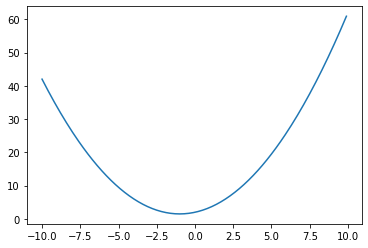

In [32]:
import matplotlib.pyplot as plt

x = np.arange(-10, 10, 0.1)

def f(x):
    return 2 + x + 0.5*x**2
y =f(x)
plt.plot(x,y)

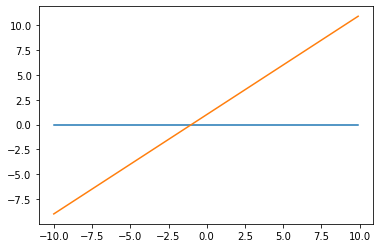

In [38]:
def df(x):
    return 1 + 1*x

plt.plot(x, np.zeros((len(x))))
plt.plot(x, df(x))

In [42]:
x[y.argmin()]


-1.000000000000032

# Additional Task

---


### Task: Ordinary Least Squares

Ordinary least squares (OLS) is a popular apprach for estimating a linear fit. Its matrix formulation is given by:

$$
(X^TX)\hat{\beta}=X^Ty
\Rightarrow
\hat{\beta}=(X^TX)^{-1}X^Ty
$$

> Calculate the OLS of the given datapoints below.

Feel free to check your results using `lm()` in R or using [`statsmodels`](https://www.statsmodels.org/stable/regression.html) or [`sklearn`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

**Bonus:** Plot the fit, does it make sense?

**Bonus:** Using OLS fit a quadratic polynomial

In [18]:
# our x, y datapoints
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

# add a list of ones denoting intercept
X = np.vstack([np.ones(len(x)), x]).T
print(X)
print(y)

# solve using OLS:
# ...

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]]
[-1.   0.2  0.9  2.1]


In [19]:
(np.linalg.inv(X.T @ X) @ X.T) @ y

array([-0.95,  1.  ])

### Task: One-hot encoding

One-hot encoding denote transforming a series of categories (e.g. "Natural language processing", "Neuroscience" ... or 1, 2, ...) into a matrix of shape (*, num_classes) that have zeros 
everywhere except where the index (of the last dimension) mathces the corresponding value of the input label, in which case it will be 1. For instance the vector `[0, 1, 0]` could denote "Neuroscience".

**Example:**
```
np.random.seed(101) 
arr = np.random.randint(1,4, size=6)
print(arr)
print(one_hot(arr))

```

Output:
```
array([2, 3, 2, 2, 2, 1])
array([[ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.]])
```

In [2]:
import numpy as np
np.random.seed(101) 
arr = np.random.randint(1,4, size=6)

def one_hot_encodings(arr):
    uniqs = np.unique(arr)
    out = np.zeros((arr.shape[0], uniqs.shape[0]))
    for i, k in enumerate(arr):
        out[i, k-1] = 1
    return out

one_hot_encodings(arr)

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

### Task: Creating the bullseye

> Create a function which for an input shape (Tuple[int, int]) return a matrix of the same shape where the border are ones, the middle is 8 and the remainder is zeros.

**Example:**
```
print(bullseye((5, 5)))
print(bullseye((5, 6)))
```

Output:
```
[[1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 9. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1.]]

[[1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 1.]
 [1. 0. 9. 9. 0. 1.]
 [1. 0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1. 1.]]

```

In [3]:
from typing import Tuple

import numpy as np


def bullseye(
    dims: Tuple[int, int], bullseye_value: int = 9, border_value: int = 1
) -> np.ndarray:
    """Creates a bullseye numpy array, where the center in 9s and the border is 1s.

    Args:
        dims (Tuple[int, int]): The dimensions of the bullseye
        bullseye_value (int): The value in the middle of the bullseye. Defaults to 9.
        border_value (int): The border value. Defualts to 1.

    Returns:
        np.ndarray: The bullseye array
    """

    # create border (version 1)
    arr = np.zeros(dims)  # create np.array of zeros
    # each border at a time
    arr[0] = 1
    arr[-1] = 1
    arr[:, 0] = 1
    arr[:, -1] = 1

    # create border (version 2)
    arr = np.zeros(dims)  # create np.array of zeros
    # two border
    arr[[0, -1]] = 1
    arr[:, [0, -1]] = 1

    # create border (version 3)
    arr = np.ones(dims)  # create an ones
    arr[1:-1, 1:-1] = 0  # turn the middle into zeros

    # extract middle:
    middles = []
    for dim in arr.shape:
        if dim % 2 == 0:  # if it is even
            middle = int(dim / 2)
            # or equivalent use integer division //
            middle = dim // 2
            middles.append([middle - 1, middle])
        else:  # if uneven
            middle = dim // 2

            # I save the middle here twice such that the following code can be the same
            # for the two conditions. Alternatively one could also handle the 4 cases
            # independently
            middles.append([middle, middle])

    # change middle to 9s
    x_coords, y_coords = middles
    arr[x_coords[0] : x_coords[1] + 1, y_coords[0] : y_coords[1] + 1] = 9

    return arr


print(bullseye(dims=(5, 5)))
print("\n-----------\n")
print(bullseye((5, 6)))
print("\n-----------\n")
print(bullseye((6, 6)))


[[1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 9. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1.]]

-----------

[[1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 1.]
 [1. 0. 9. 9. 0. 1.]
 [1. 0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1. 1.]]

-----------

[[1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 1.]
 [1. 0. 9. 9. 0. 1.]
 [1. 0. 9. 9. 0. 1.]
 [1. 0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1. 1.]]
